# 1. Importing all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 2. Train data reading

In [2]:
train = pd.read_csv(r"C:\Users\risew\Downloads\Python - assignment\Train_Data\Data\train.csv")
test = pd.read_csv(r"C:\Users\risew\Downloads\Python - assignment\Train_Data\Data\test.csv")

# 3. Data exploration (EDA)

In [3]:
train.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [4]:
train.columns

Index(['user_name', 'country', 'review_title', 'review_description',
       'designation', 'points', 'price', 'province', 'region_1', 'region_2',
       'winery', 'variety'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           63264 non-null  object 
 1   country             82622 non-null  object 
 2   review_title        82657 non-null  object 
 3   review_description  82657 non-null  object 
 4   designation         59010 non-null  object 
 5   points              82657 non-null  int64  
 6   price               77088 non-null  float64
 7   province            82622 non-null  object 
 8   region_1            69903 non-null  object 
 9   region_2            35949 non-null  object 
 10  winery              82657 non-null  object 
 11  variety             82657 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20665 entries, 0 to 20664
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           15927 non-null  object 
 1   country             20661 non-null  object 
 2   review_title        20665 non-null  object 
 3   review_description  20665 non-null  object 
 4   designation         14676 non-null  object 
 5   points              20665 non-null  int64  
 6   price               19271 non-null  float64
 7   province            20661 non-null  object 
 8   region_1            17351 non-null  object 
 9   region_2            8914 non-null   object 
 10  winery              20665 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.7+ MB


In [7]:
train.isnull().sum().sort_values(ascending = False)

region_2              46708
designation           23647
user_name             19393
region_1              12754
price                  5569
country                  35
province                 35
review_title              0
review_description        0
points                    0
winery                    0
variety                   0
dtype: int64

<AxesSubplot:>

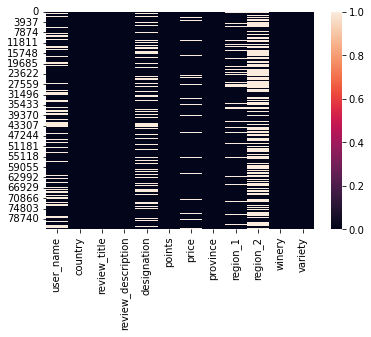

In [8]:
sns.heatmap(train.isnull())

In [9]:
test.isnull().sum().sort_values(ascending = False)

region_2              11751
designation            5989
user_name              4738
region_1               3314
price                  1394
country                   4
province                  4
review_title              0
review_description        0
points                    0
winery                    0
dtype: int64

<AxesSubplot:>

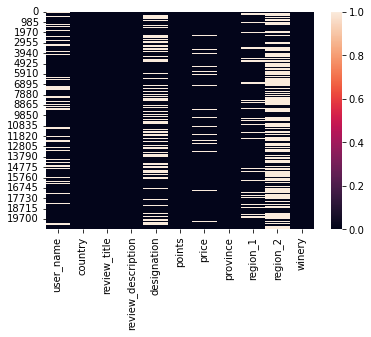

In [10]:
sns.heatmap(test.isnull())

In [11]:
train['price'].value_counts()

20.0     4206
15.0     3627
25.0     3596
30.0     3127
18.0     2886
         ... 
451.0       1
276.0       1
672.0       1
455.0       1
247.0       1
Name: price, Length: 351, dtype: int64

In [12]:
train['price'].describe()

count    77088.000000
mean        36.922232
std         43.698346
min          4.000000
25%         18.000000
50%         27.000000
75%         45.000000
max       3300.000000
Name: price, dtype: float64

In [13]:
train['price'].fillna(train['price'].median(), inplace=True)

In [14]:
train.describe(include='object')

,user_name,country,review_title,review_description,designation,province,region_1,region_2,winery,variety
count,63264,82622,82657,82657,59010,82622,69903,35949,82657,82657
unique,15,38,76983,77628,26424,358,1019,17,13786,28
top,@vossroger,US,Korbel NV Brut Sparkling (California),This single-vineyard Barolo shows ripe berry a...,Reserve,California,Napa Valley,Central Coast,Testarossa,Pinot Noir
freq,17539,38573,8,2,1382,25736,3334,7503,175,10587


<AxesSubplot:>

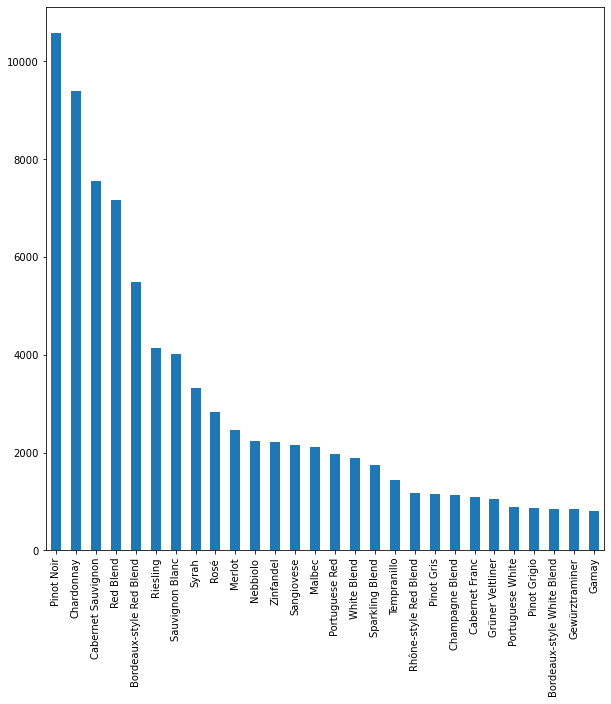

In [56]:
train['variety'].value_counts().plot.bar(figsize = (10, 10))

In [15]:
train.isnull().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                     0
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

In [16]:
train['points'].describe()

count    82657.000000
mean        88.544564
std          3.099649
min         80.000000
25%         86.000000
50%         88.000000
75%         91.000000
max        100.000000
Name: points, dtype: float64

In [17]:
train['points'].value_counts()

88     10504
87     10306
90      9929
86      7641
89      7495
91      7421
92      6412
85      5999
93      4522
84      4174
94      2704
83      1951
82      1184
95      1094
81       433
96       382
80       254
97       166
98        49
99        25
100       12
Name: points, dtype: int64

In [18]:
train.head(1)['review_description'].values

array(['Classic Chardonnay aromas of apple, pear and hay lead into a palate marked by decent intensity but also a bit of sweetness. Orange and candy notes run through the rather short finish.'],
      dtype=object)

# 4. Input Data 

In [19]:
train['source'] = 'train'
test['source'] = 'test'

In [20]:
winedata = pd.concat([train, test])

In [21]:
winedata

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety,source
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay,train
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend,train
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo,train
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend,train
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20660,@gordone_cellars,US,Yorkville Cellars 2013 Rennie Vineyard Caberne...,"Clearly focused and fruit-driven, this wine ha...",Rennie Vineyard,91,34.0,California,Yorkville Highlands,North Coast,Yorkville Cellars,NaN,test
20661,@laurbuzz,France,Château Ribaute 2015 Senhal d'Aric Rosé (Corbi...,Herbal tones of bay and rosemary are upfront o...,Senhal d'Aric,84,20.0,Languedoc-Roussillon,Corbières,NaN,Château Ribaute,NaN,test
20662,@mattkettmann,US,Daou 2014 Reserve Cabernet Sauvignon (Paso Rob...,"Mocha cream, pencil shaving and dried herb aro...",Reserve,94,85.0,California,Paso Robles,Central Coast,Daou,NaN,test
20663,@wineschach,Spain,Peñascal 2011 Tempranillo Rosé (Vino de la Tie...,Loud citrus and berry aromas precede an overlo...,Tempranillo,80,9.0,Northern Spain,Vino de la Tierra de Castilla y León,NaN,Peñascal,NaN,test


In [22]:
winedata.isnull().sum().sort_values(ascending = False)

region_2              58459
designation           29636
user_name             24131
variety               20665
region_1              16068
price                  1394
country                  39
province                 39
review_title              0
review_description        0
points                    0
winery                    0
source                    0
dtype: int64

<AxesSubplot:>

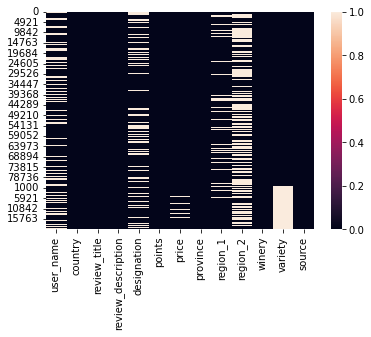

In [23]:
sns.heatmap(winedata.isnull())

In [24]:
corr=winedata.corr()
corr

,points,price
points,1.00000,0.40191
price,0.40191,1.00000


<AxesSubplot:>

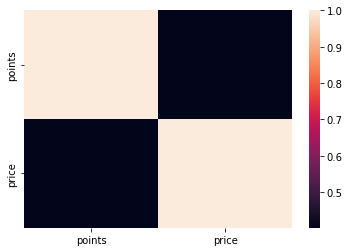

In [25]:
sns.heatmap(corr)

In [26]:
winedata.columns

Index(['user_name', 'country', 'review_title', 'review_description',
       'designation', 'points', 'price', 'province', 'region_1', 'region_2',
       'winery', 'variety', 'source'],
      dtype='object')

In [27]:
# drop high null values columns
winedata_new=winedata[['country','review_title','review_description','points','province','winery','variety','source']]

In [28]:
# Drop null values from country and province
winedata_new.dropna(subset=['country'],inplace=True)

In [29]:
winedata_new.isnull().sum().sort_values(ascending = False)

variety               20661
country                   0
review_title              0
review_description        0
points                    0
province                  0
winery                    0
source                    0
dtype: int64

In [30]:
winedata_new.head()

,country,review_title,review_description,points,province,winery,variety,source
0,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",83,Australia Other,Andrew Peace,Chardonnay,train
1,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,89,Washington,North by Northwest,Red Blend,train
2,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,94,Piedmont,Renato Ratti,Nebbiolo,train
3,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,87,Southwest France,Domaine l'Ancienne Cure,Bordeaux-style White Blend,train
4,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",88,France Other,Château du Cèdre,Malbec,train


In [31]:
winedata_new["detail"]=winedata_new['country'] + winedata_new['province'] + winedata_new['winery'] + winedata_new['review_title'] + winedata_new['review_description']

In [32]:
winedata_new

,country,review_title,review_description,points,province,winery,variety,source,detail
0,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",83,Australia Other,Andrew Peace,Chardonnay,train,AustraliaAustralia OtherAndrew PeaceAndrew Pea...
1,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,89,Washington,North by Northwest,Red Blend,train,USWashingtonNorth by NorthwestNorth by Northwe...
2,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,94,Piedmont,Renato Ratti,Nebbiolo,train,ItalyPiedmontRenato RattiRenato Ratti 2007 Con...
3,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,87,Southwest France,Domaine l'Ancienne Cure,Bordeaux-style White Blend,train,FranceSouthwest FranceDomaine l'Ancienne CureD...
4,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",88,France Other,Château du Cèdre,Malbec,train,FranceFrance OtherChâteau du CèdreChâteau du C...
...,...,...,...,...,...,...,...,...,...
20660,US,Yorkville Cellars 2013 Rennie Vineyard Caberne...,"Clearly focused and fruit-driven, this wine ha...",91,California,Yorkville Cellars,NaN,test,USCaliforniaYorkville CellarsYorkville Cellars...
20661,France,Château Ribaute 2015 Senhal d'Aric Rosé (Corbi...,Herbal tones of bay and rosemary are upfront o...,84,Languedoc-Roussillon,Château Ribaute,NaN,test,FranceLanguedoc-RoussillonChâteau RibauteChâte...
20662,US,Daou 2014 Reserve Cabernet Sauvignon (Paso Rob...,"Mocha cream, pencil shaving and dried herb aro...",94,California,Daou,NaN,test,USCaliforniaDaouDaou 2014 Reserve Cabernet Sau...
20663,Spain,Peñascal 2011 Tempranillo Rosé (Vino de la Tie...,Loud citrus and berry aromas precede an overlo...,80,Northern Spain,Peñascal,NaN,test,SpainNorthern SpainPeñascalPeñascal 2011 Tempr...


<AxesSubplot:>

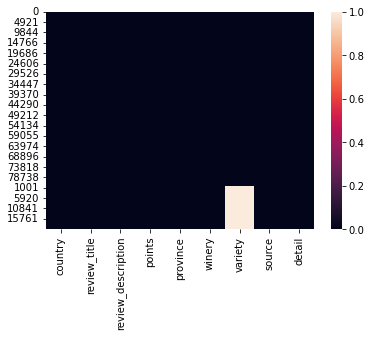

In [33]:
sns.heatmap(winedata_new.isnull())

# 5. Text data pre-processing 

In [34]:
import re
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    cleaned_text
    return cleaned_text

In [35]:
winedata_new["detail_clean"] = winedata_new["detail"].apply(remove_tags)

In [36]:
winedata_new["detail_clean"] = winedata_new["detail_clean"].apply(lambda x: x.lower())

In [37]:
winedata_new

,country,review_title,review_description,points,province,winery,variety,source,detail,detail_clean
0,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",83,Australia Other,Andrew Peace,Chardonnay,train,AustraliaAustralia OtherAndrew PeaceAndrew Pea...,australiaaustralia otherandrew peaceandrew pea...
1,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,89,Washington,North by Northwest,Red Blend,train,USWashingtonNorth by NorthwestNorth by Northwe...,uswashingtonnorth by northwestnorth by northwe...
2,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,94,Piedmont,Renato Ratti,Nebbiolo,train,ItalyPiedmontRenato RattiRenato Ratti 2007 Con...,italypiedmontrenato rattirenato ratti 2007 con...
3,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,87,Southwest France,Domaine l'Ancienne Cure,Bordeaux-style White Blend,train,FranceSouthwest FranceDomaine l'Ancienne CureD...,francesouthwest francedomaine l'ancienne cured...
4,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",88,France Other,Château du Cèdre,Malbec,train,FranceFrance OtherChâteau du CèdreChâteau du C...,francefrance otherchâteau du cèdrechâteau du c...
...,...,...,...,...,...,...,...,...,...,...
20660,US,Yorkville Cellars 2013 Rennie Vineyard Caberne...,"Clearly focused and fruit-driven, this wine ha...",91,California,Yorkville Cellars,NaN,test,USCaliforniaYorkville CellarsYorkville Cellars...,uscaliforniayorkville cellarsyorkville cellars...
20661,France,Château Ribaute 2015 Senhal d'Aric Rosé (Corbi...,Herbal tones of bay and rosemary are upfront o...,84,Languedoc-Roussillon,Château Ribaute,NaN,test,FranceLanguedoc-RoussillonChâteau RibauteChâte...,francelanguedoc-roussillonchâteau ribautechâte...
20662,US,Daou 2014 Reserve Cabernet Sauvignon (Paso Rob...,"Mocha cream, pencil shaving and dried herb aro...",94,California,Daou,NaN,test,USCaliforniaDaouDaou 2014 Reserve Cabernet Sau...,uscaliforniadaoudaou 2014 reserve cabernet sau...
20663,Spain,Peñascal 2011 Tempranillo Rosé (Vino de la Tie...,Loud citrus and berry aromas precede an overlo...,80,Northern Spain,Peñascal,NaN,test,SpainNorthern SpainPeñascalPeñascal 2011 Tempr...,spainnorthern spainpeñascalpeñascal 2011 tempr...


In [38]:
df= winedata_new[["detail_clean","points","variety","source"]]
df

,detail_clean,points,variety,source
0,australiaaustralia otherandrew peaceandrew pea...,83,Chardonnay,train
1,uswashingtonnorth by northwestnorth by northwe...,89,Red Blend,train
2,italypiedmontrenato rattirenato ratti 2007 con...,94,Nebbiolo,train
3,francesouthwest francedomaine l'ancienne cured...,87,Bordeaux-style White Blend,train
4,francefrance otherchâteau du cèdrechâteau du c...,88,Malbec,train
...,...,...,...,...
20660,uscaliforniayorkville cellarsyorkville cellars...,91,NaN,test
20661,francelanguedoc-roussillonchâteau ribautechâte...,84,NaN,test
20662,uscaliforniadaoudaou 2014 reserve cabernet sau...,94,NaN,test
20663,spainnorthern spainpeñascalpeñascal 2011 tempr...,80,NaN,test


In [39]:
df

,detail_clean,points,variety,source
0,australiaaustralia otherandrew peaceandrew pea...,83,Chardonnay,train
1,uswashingtonnorth by northwestnorth by northwe...,89,Red Blend,train
2,italypiedmontrenato rattirenato ratti 2007 con...,94,Nebbiolo,train
3,francesouthwest francedomaine l'ancienne cured...,87,Bordeaux-style White Blend,train
4,francefrance otherchâteau du cèdrechâteau du c...,88,Malbec,train
...,...,...,...,...
20660,uscaliforniayorkville cellarsyorkville cellars...,91,NaN,test
20661,francelanguedoc-roussillonchâteau ribautechâte...,84,NaN,test
20662,uscaliforniadaoudaou 2014 reserve cabernet sau...,94,NaN,test
20663,spainnorthern spainpeñascalpeñascal 2011 tempr...,80,NaN,test


In [40]:
train_f=df.loc[df['source']=='train']
test_f=df.loc[df['source']=='test']

In [41]:
train_f.drop('source',axis=1,inplace=True)
test_f.drop('source',axis=1,inplace=True)

In [42]:
train_f

,detail_clean,points,variety
0,australiaaustralia otherandrew peaceandrew pea...,83,Chardonnay
1,uswashingtonnorth by northwestnorth by northwe...,89,Red Blend
2,italypiedmontrenato rattirenato ratti 2007 con...,94,Nebbiolo
3,francesouthwest francedomaine l'ancienne cured...,87,Bordeaux-style White Blend
4,francefrance otherchâteau du cèdrechâteau du c...,88,Malbec
...,...,...,...
82652,spainnorthern spainmontecillomontecillo 2007 c...,84,Tempranillo
82653,usnew mexicovivác wineryvivác winery 2008 sing...,85,Cabernet Sauvignon
82654,francebeaujolaisdomaine de la madonedomaine de...,87,Gamay
82655,francebordeauxchâteau beaumontchâteau beaumont...,91,Bordeaux-style Red Blend


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
train_final = tfidf.fit_transform(train_f['detail_clean']).toarray()
test_final = tfidf.transform(train_f['detail_clean']).toarray()

In [44]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(train_f["variety"])

# 6.  Model 

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_final,y,test_size=0.33,random_state=1)

In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9347905816768136

In [48]:
rf.feature_importances_

array([2.51510402e-05, 6.89514919e-06, 8.09185141e-06, ...,
       1.80765416e-05, 1.30495100e-05, 1.35623529e-05])

In [49]:
pridict_variety_rf= rf.predict(test_final)

In [50]:
from sklearn.linear_model import LogisticRegression

logit1 = LogisticRegression(random_state = 0)
logit1.fit(X_train,y_train)
y_pred = logit1.predict(X_test)
accuracy_score(y_test,y_pred)

0.9454265385461748

In [51]:
pridict_variety_lr= rf.predict(test_final)

In [52]:
print(pridict_variety_rf)

[ 5 17 11 ...  6  0  3]


In [53]:
variety= encoder.inverse_transform(pridict_variety_rf)
variety=pd.DataFrame(variety)

In [54]:
variety.to_csv("C:/Users/risew/Downloads/test_variety.csv")